In [68]:
import pandas as pd

movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [69]:
# we join movies with their ratings and pivot the table
movies_ratings = pd.merge(movies, ratings, on='movieId', how='inner').pivot(index='movieId', columns='userId', values='rating')

# look into our result
movies_ratings.head()

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 610 columns]

In [70]:
# should not make any difference
mr = pd.DataFrame(movies_ratings)#.transpose # have to transpose to get it right with the indexes

In [71]:
# we fill all cells that have a NaN-Value with their row-average
mr.fillna(mr.mean(), inplace=True,axis=0) # we fill the empty values with the mean of this row
mr.head()

userId        1         2         3         4         5         6         7    \
movieId                                                                         
1        4.000000  3.948276  2.435897  3.555556  4.000000  3.493631  4.500000   
2        4.366379  3.948276  2.435897  3.555556  3.636364  4.000000  3.230263   
3        4.000000  3.948276  2.435897  3.555556  3.636364  5.000000  3.230263   
4        4.366379  3.948276  2.435897  3.555556  3.636364  3.000000  3.230263   
5        4.366379  3.948276  2.435897  3.555556  3.636364  5.000000  3.230263   

userId        8        9         10   ...       601       602       603   604  \
movieId                               ...                                       
1        3.574468  3.26087  3.278571  ...  4.000000  3.392593  4.000000  3.00   
2        4.000000  3.26087  3.278571  ...  4.425743  4.000000  3.507953  5.00   
3        3.574468  3.26087  3.278571  ...  4.425743  3.392593  3.507953  3.48   
4        3.574468  3.26087  3.278571  ...  4.425743  3.392593  3.507953  3.48   
5        3.574468  3.26087  3.278571  ...  4.425743  3.392593  3.507953  3.00   

userId        605       606       607       608      609       610  
movieId                                                             
1        4.000000  2.500000  4.000000  2.500000  3.00000  5.000000  
2        3.500000  3.657399  3.786096  2.000000  3.27027  3.688556  
3        3.210407  3.657399  3.786096  2.000000  3.27027  3.688556  
4        3.210407  3.657399  3.786096  3.134176  3.27027  3.688556  
5        3.210407  3.657399  3.786096  3.134176  3.27027  3.688556  

[5 rows x 610 columns]

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def evaluate_kmeans(data, rg=range(1,25)):
    """
    This functions takes training data and tries a range of parameters for the # of clusters in KMeans
    The resulting output is a graph that can be checked by a humand to make the final choice.
    """
    sse_values = {}
    for k in rg:
        km = KMeans(n_clusters=k, random_state=0).fit(data)
        sse_values[k] = km.inertia_
        pass
    
    plt.figure()
    plt.plot(list(sse_values.keys()), list(sse_values.values()))
    plt.xlabel("K")
    plt.ylabel("SSE")
    plt.show()
        
    pass

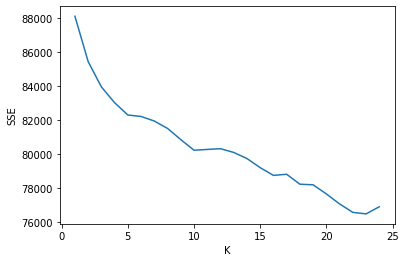

In [73]:
evaluate_kmeans(data=mr)

In [102]:
from sklearn.cluster import AgglomerativeClustering

# We create and train a Hierarchical Agglomerative Clustering Model
haclustering = AgglomerativeClustering(n_clusters=22, affinity='euclidean',linkage='complete')
hacpredict = haclustering.fit_predict(mr)

In [103]:
genres = pd.read_csv('ml-latest-small/movies.csv').genres
mr_genres = pd.merge(mr, genres, on='movieId', how='inner')

# we determine a KMeans-Clustering
kmeans_pred = KMeans(n_clusters=22).fit_predict(mr)

In [104]:
# I do not know how this function evaluates.
# I jave tried various implementations of purity myself but was not able to get any results. 
# Therefore I am willing to accept zero points for this part of the exercise.
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [108]:
# Calculate the purity score
kmeans_purity_score = purity_score(genres[:9724],kmeans_pred)
hac_purity_score = purity_score(genres[:len(hacpredict)],hacpredict)

print(f'K-Means Purity: {kmeans_purity_score}\nHAC Purity: {hac_purity_score}')

K-Means Purity: 0.11199095022624435
HAC Purity: 0.11013986013986014
